In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r"C:file.csv")
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10


# Check normality

### QQ-plot

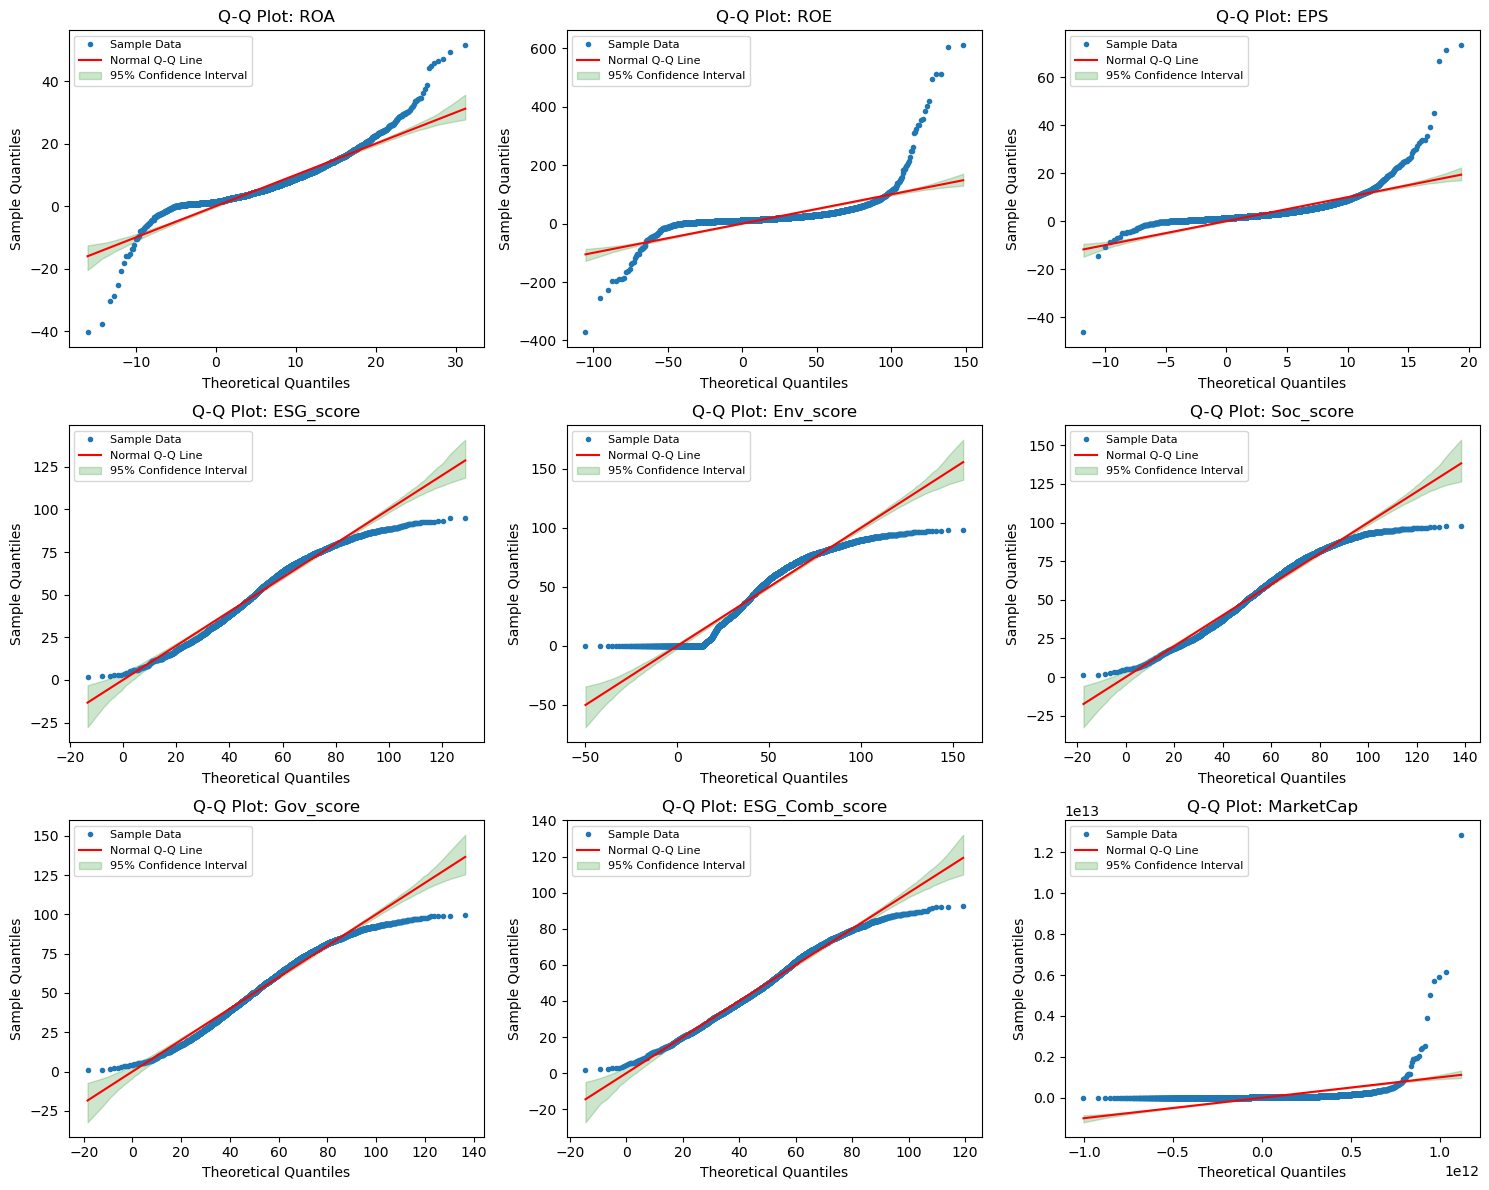

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of variables to check
variables = ['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

plt.figure(figsize=(15, 12))

for i, var in enumerate(variables, 1):
    data = df[var].dropna().values
    n = len(data)

    if n < 10:
        continue  # skip if not enough data

    # Sort sample
    sample_q = np.sort(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    # Theoretical quantiles
    probs = (np.arange(1, n + 1) - 0.5) / n
    theoretical_q = stats.norm.ppf(probs, loc=mean, scale=std)

    # Simulate confidence intervals
    n_sim = 1000
    sim_qs = np.zeros((n_sim, n))
    for j in range(n_sim):
        sim_data = np.random.normal(loc=mean, scale=std, size=n)
        sim_qs[j, :] = np.sort(sim_data)

    lower_bound = np.percentile(sim_qs, 2.5, axis=0)
    upper_bound = np.percentile(sim_qs, 97.5, axis=0)

    # Plot
    plt.subplot(3, 3, i)
    plt.plot(theoretical_q, sample_q, 'o', markersize=3, label='Sample Data')
    plt.plot(theoretical_q, theoretical_q, 'r-', label='Normal Q-Q Line')
    plt.fill_between(theoretical_q, lower_bound, upper_bound, color='green', alpha=0.2, label='95% Confidence Interval')

    plt.title(f"Q-Q Plot: {var}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.legend(fontsize=8)

plt.tight_layout()
plt.savefig("QQ-plots_with_curved_CI_USA.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of variables you want to test
variables = ['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

# Create a dataframe to store Shapiro-Wilk results
shapiro_results = pd.DataFrame(columns=['Variable', 'W-statistic', 'p-value'])

# Loop through each variable
for var in variables:
    data = df[var].dropna()
    w_statistic, p_value = stats.shapiro(data)
    shapiro_results = pd.concat([shapiro_results, pd.DataFrame({'Variable': [var],
                                                                'W-statistic': [w_statistic],
                                                                'p-value': [p_value]})],
                                ignore_index=True)

# Display results
print(shapiro_results)

# Optional: highlight which variables are significantly non-normal (e.g., p-value < 0.05)
print("\nVariables where normality is rejected at 5% significance level:")
print(shapiro_results[shapiro_results['p-value'] < 0.05]['Variable'].tolist())

         Variable  W-statistic       p-value
0             ROA     0.913475  2.595005e-45
1             ROE     0.481777  7.743260e-79
2             EPS     0.671621  2.165569e-69
3       ESG_score     0.968171  1.034909e-30
4       Env_score     0.928339  2.467207e-42
5       Soc_score     0.971307  2.291300e-29
6       Gov_score     0.976588  8.050170e-27
7  ESG_Comb_score     0.987999  2.584333e-19
8       MarketCap     0.109855  7.721607e-91

Variables where normality is rejected at 5% significance level:
['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_27636\180645716.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  shapiro_results = pd.concat([shapiro_results, pd.DataFrame({'Variable': [var],


### Kolmogorov Smirnov test

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of variables to test
variables = ['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

# Create a dataframe to store K-S test results
ks_results = pd.DataFrame(columns=['Variable', 'D-statistic', 'p-value'])

# Loop through each variable
for var in variables:
    data = df[var].dropna()
    # Standardize the data
    standardized_data = (data - data.mean()) / data.std()
    # Compare against standard normal distribution
    d_statistic, p_value = stats.kstest(standardized_data, 'norm')
    
    ks_results = pd.concat([ks_results, pd.DataFrame({'Variable': [var],
                                                      'D-statistic': [d_statistic],
                                                      'p-value': [p_value]})],
                           ignore_index=True)

# Display results
print(ks_results)

# Optional: highlight which variables are significantly non-normal (e.g., p-value < 0.05)
print("\nVariables where normality is rejected at 5% significance level:")
print(ks_results[ks_results['p-value'] < 0.05]['Variable'].tolist())


         Variable  D-statistic        p-value
0             ROA     0.098544   3.289007e-39
1             ROE     0.240174  3.010330e-233
2             EPS     0.158469  4.829280e-101
3       ESG_score     0.075319   4.565620e-23
4       Env_score     0.098857   1.860337e-39
5       Soc_score     0.059436   1.602915e-14
6       Gov_score     0.051290   6.365916e-11
7  ESG_Comb_score     0.045583   1.022657e-08
8       MarketCap     0.419860   0.000000e+00

Variables where normality is rejected at 5% significance level:
['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_33452\43028766.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ks_results = pd.concat([ks_results, pd.DataFrame({'Variable': [var],


### Spearman's rank correlation test

In [6]:
from scipy import stats
import pandas as pd

# Define ESG variables and financial ratios
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
financial_vars = ['EPS', 'ROA', 'ROE']

# Create a list to store results
results = []

# Loop over all combinations and compute Spearman's correlation
for esg in esg_vars:
    for fin in financial_vars:
        # Drop NA values for this pair
        df_pair = df[[esg, fin]].dropna()
        corr, p_value = stats.spearmanr(df_pair[esg], df_pair[fin])
        results.append({
            'ESG Variable': esg,
            'Financial Ratio': fin,
            'Spearman Correlation': corr,
            'P-value': p_value
        })

# Convert results to DataFrame
spearman_results = pd.DataFrame(results)

# Display results
print(spearman_results)

      ESG Variable Financial Ratio  Spearman Correlation       P-value
0        ESG_score             EPS              0.251288  5.706211e-67
1        ESG_score             ROA              0.040451  6.154643e-03
2        ESG_score             ROE              0.094954  1.176038e-10
3        Env_score             EPS              0.243223  9.958773e-63
4        Env_score             ROA             -0.034108  2.091145e-02
5        Env_score             ROE              0.021113  1.528952e-01
6        Soc_score             EPS              0.249449  5.458921e-66
7        Soc_score             ROA              0.073378  6.558568e-07
8        Soc_score             ROE              0.117131  1.769513e-15
9        Gov_score             EPS              0.142486  3.167512e-22
10       Gov_score             ROA             -0.036009  1.475404e-02
11       Gov_score             ROE              0.021365  1.480494e-01
12  ESG_Comb_score             EPS              0.216520  8.909115e-50
13  ES

# Control variables

### Market Capitalization

In [7]:
import pandas as pd

# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)

In [9]:
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10,Large Cap
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09,Mid Cap
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09,Mid Cap
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09,Mid Cap
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09,Mid Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10,Large Cap
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10,Large Cap
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11,Large Cap
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10,Large Cap


In [21]:
import pandas as pd
from scipy.stats import kruskal

# ESG variables to test
esg_variables = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

kruskal_results_usa = []

for var in esg_variables:
    # Drop NaN values and ensure each group has data
    grouped = df.groupby('Market Capitalization Category')[var].apply(lambda x: x.dropna())
    valid_groups = [group for group in grouped.groupby(level=0) if not group[1].empty]

    # Extract only the values (drop the group names)
    values = [group[1].values for group in valid_groups]

    # Only run test if there are at least 2 groups with data
    if len(values) >= 2:
        stat, p = kruskal(*values)
    else:
        stat, p = None, None

    kruskal_results_usa.append({'Variable': var, 'Test Statistic': stat, 'p-value': p})

# Convert results to DataFrame
kruskal_results_df_usa = pd.DataFrame(kruskal_results_usa)
print(kruskal_results_df_usa)



         Variable  Test Statistic        p-value
0       ESG_score      863.544951  7.147941e-187
1       Env_score      858.265709  9.982181e-186
2       Soc_score      796.419905  2.586249e-172
3       Gov_score      244.728289   9.035936e-53
4  ESG_Comb_score      510.863145  2.110656e-110


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28380\557396352.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Market Capitalization Category')[var].apply(lambda x: x.dropna())
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28380\557396352.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valid_groups = [group for group in grouped.groupby(level=0) if not group[1].empty]
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28380\557396352.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

In [13]:
from scipy.stats import kruskal

# List of ESG variables to test
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Iterate over each ESG variable and perform the Kruskal-Wallis test
for column in esg_columns:
    groups = [df[df['Market Capitalization Category'] == category][column]
              for category in df['Market Capitalization Category'].unique()]

    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for {column}:")
    print(f"H-statistic: {stat}")
    print(f"P-value: {p_value}\n")

Kruskal-Wallis test for ESG_score:
H-statistic: 863.5449512348439
P-value: 7.14794146986807e-187

Kruskal-Wallis test for Env_score:
H-statistic: 858.2657086238313
P-value: 9.982181072562857e-186

Kruskal-Wallis test for Soc_score:
H-statistic: 796.4199050676185
P-value: 2.5862492344478168e-172

Kruskal-Wallis test for Gov_score:
H-statistic: 244.72828949058893
P-value: 9.035936097006524e-53

Kruskal-Wallis test for ESG_Comb_score:
H-statistic: 510.8631454154926
P-value: 2.110655987260781e-110



In [13]:
#for industry
import pandas as pd
from scipy.stats import kruskal

# Function to perform Kruskal-Wallis test within each industry
def kruskal_by_industry(df, esg_col, perf_col, n_groups=3):
    results = []

    # Group by industry
    for industry, group in df.groupby("NAICS National Industry Name"):
        # Drop NA values
        data = group[[esg_col, perf_col]].dropna()

        if len(data) < n_groups:
            continue  # skip industries with too few data points

        # Create ESG quantile groups (e.g., tertiles)
        data['ESG_group'] = pd.qcut(data[esg_col], q=n_groups, labels=False, duplicates='drop')

        # Get performance values per group
        grouped_perf = [data[data['ESG_group'] == i][perf_col] for i in range(data['ESG_group'].nunique())]

        if len(grouped_perf) < 2:
            continue  # skip if only one ESG group remains

        # Kruskal-Wallis test
        stat, p_value = kruskal(*grouped_perf)

        results.append({
            'Industry': industry,
            'ESG_Variable': esg_col,
            'Financial_Ratio': perf_col,
            'H_statistic': stat,
            'p_value': p_value,
            'Num_Groups': len(grouped_perf),
            'N_Obs': len(data)
        })

    return pd.DataFrame(results)

# Example usage: Test EPS vs ESG_score within each industry
result_eps = kruskal_by_industry(df, esg_col='ESG_score', perf_col='EPS')
result_roe = kruskal_by_industry(df, esg_col='ESG_score', perf_col='ROE')
result_roa = kruskal_by_industry(df, esg_col='ESG_score', perf_col='ROA')

# Combine all results if needed
all_results = pd.concat([result_eps, result_roe, result_roa], ignore_index=True)

# Optional: Filter significant results
significant_results = all_results[all_results['p_value'] < 0.05]

# Display
print(significant_results.sort_values(by='p_value'))


                                              Industry ESG_Variable  \
20   Computing Infrastructure Providers, Data Proce...    ESG_score   
120                 Securities and Commodity Exchanges    ESG_score   
330                         Crude Petroleum Extraction    ESG_score   
35        Direct Health and Medical Insurance Carriers    ESG_score   
51   Financial Transactions Processing, Reserve, an...    ESG_score   
..                                                 ...          ...   
186                     Direct Life Insurance Carriers    ESG_score   
318              Computer Storage Device Manufacturing    ESG_score   
121      Security Systems Services (except Locksmiths)    ESG_score   
343  Electrical Apparatus and Equipment, Wiring Sup...    ESG_score   
277                           Soft Drink Manufacturing    ESG_score   

    Financial_Ratio  H_statistic       p_value  Num_Groups  N_Obs  
20              EPS    39.763276  2.320141e-09           3     91  
120        

In [17]:
# Count significant hits per ESG variable
significance_summary = significant_results.groupby(['ESG_Variable'])['Industry'].nunique().reset_index()
significance_summary.columns = ['ESG_Variable', 'Num_Significant_Industries']
print(significance_summary)


  ESG_Variable  Num_Significant_Industries
0    ESG_score                         127


In [5]:
from scipy.stats import kruskal

# List of ESG variables to test
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Iterate over each ESG variable
for column in esg_columns:
    # Group ESG variable by Industry
    groups = [df[df['NAICS National Industry Name'] == industry][column].dropna()
              for industry in df['NAICS National Industry Name'].unique()]
    
    # Skip if fewer than 2 groups with data
    if sum(len(group) > 0 for group in groups) < 2:
        print(f"Not enough data to test {column}")
        continue

    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    print(f"Kruskal-Wallis test for {column} by NAICS National Industry Name:")
    print(f"H-statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4e}\n")

Kruskal-Wallis test for ESG_score by NAICS National Industry Name:
H-statistic: 1584.9828
P-value: 7.4803e-238

Kruskal-Wallis test for Env_score by NAICS National Industry Name:
H-statistic: 1634.0144
P-value: 1.6019e-247

Kruskal-Wallis test for Soc_score by NAICS National Industry Name:
H-statistic: 1583.5521
P-value: 1.4309e-237

Kruskal-Wallis test for Gov_score by NAICS National Industry Name:
H-statistic: 1342.9948
P-value: 1.2727e-190

Kruskal-Wallis test for ESG_Comb_score by NAICS National Industry Name:
H-statistic: 1227.6492
P-value: 1.8654e-168



In [7]:
import pandas as pd
from scipy.stats import kruskal

# Define ESG variables
esg_variables = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Store results
industry_results = {}

# Loop over each ESG variable and apply Kruskal-Wallis test across industries
for var in esg_variables:
    # Group by industry
    groups = [group[var].dropna().values for name, group in df.groupby('NAICS National Industry Name')]
    
    # Apply the Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # Store results
    industry_results[var] = {'H-statistic': stat, 'p-value': p_value}

# Display results
for var, res in industry_results.items():
    print(f"{var}:\n  H-statistic = {res['H-statistic']:.4f}, p-value = {res['p-value']:.4e}")
    if res['p-value'] < 0.05:
        print("  → Statistically significant difference across industries.\n")
    else:
        print("  → No statistically significant difference across industries.\n")

ESG_score:
  H-statistic = 1584.9828, p-value = 7.4803e-238
  → Statistically significant difference across industries.

Env_score:
  H-statistic = 1634.0144, p-value = 1.6019e-247
  → Statistically significant difference across industries.

Soc_score:
  H-statistic = 1583.5521, p-value = 1.4309e-237
  → Statistically significant difference across industries.

Gov_score:
  H-statistic = 1342.9948, p-value = 1.2727e-190
  → Statistically significant difference across industries.

ESG_Comb_score:
  H-statistic = 1227.6492, p-value = 1.8654e-168
  → Statistically significant difference across industries.



In [10]:
import scipy.stats as stats

# Example: Calculate Spearman's rank correlation between ESG_score and ROA
corr, p_value = stats.spearmanr(df['ESG_score'], df['ROA'])
print(f"Spearman's Rank Correlation: {corr}")
print(f"P-value: {p_value}")

Spearman's Rank Correlation: 0.008158931580692575
P-value: 0.5399908060692427


In [9]:
from scipy import stats
import pandas as pd

# Define ESG variables and financial ratios
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
financial_vars = ['EPS', 'ROA', 'ROE']

# Create a list to store results
results = []

# Loop over all combinations and compute Spearman's correlation
for esg in esg_vars:
    for fin in financial_vars:
        # Drop NA values for this pair
        df_pair = df[[esg, fin]].dropna()
        corr, p_value = stats.spearmanr(df_pair[esg], df_pair[fin])
        results.append({
            'ESG Variable': esg,
            'Financial Ratio': fin,
            'Spearman Correlation': corr,
            'P-value': p_value
        })

# Convert results to DataFrame
spearman_results = pd.DataFrame(results)

# Display results
print(spearman_results)


      ESG Variable Financial Ratio  Spearman Correlation        P-value
0        ESG_score             EPS              0.390314  8.726954e-205
1        ESG_score             ROA              0.008159   5.399908e-01
2        ESG_score             ROE              0.068727   2.363305e-07
3        Env_score             EPS              0.386231  3.307469e-200
4        Env_score             ROA              0.006483   6.262861e-01
5        Env_score             ROE              0.060769   4.910625e-06
6        Soc_score             EPS              0.412392  1.073182e-230
7        Soc_score             ROA              0.015971   2.302755e-01
8        Soc_score             ROE              0.073905   2.719975e-08
9        Gov_score             EPS              0.192129   4.572697e-48
10       Gov_score             ROA              0.008424   5.269291e-01
11       Gov_score             ROE              0.042253   1.498305e-03
12  ESG_Comb_score             EPS              0.397885  1.8935